In [1]:
import pandas as pd 
import numpy as np
import sys, os
import matplotlib.pyplot as plt
import pickle

IMAGES_PATH = r"E:\Learn Machine Learning\Project\Spam Email Classifier\Images"
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def save_model(file_name, estimator):
    pickle.dump(estimator, open(file_name, 'wb'))

def load_model(file_name):
    return pickle.load(open(file_name, 'rb'))

### 1. Chuẩn bị dữ liệu:
#### 1.1. Nạp dữ liệu từ file vào dataframe:

In [2]:
DATASET_PATH = os.path.join("", r"E:\Learn Machine Learning\Project\Spam Email Classifier\data\tf_idf_df.xlsx")
df = pd.read_excel(DATASET_PATH)

#### 1.2. Khảo sát qua về tập dữ liệu:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Columns: 2446 entries, đầu to label
dtypes: float64(2445), object(1)
memory usage: 27.1+ MB


In [4]:
df.columns

Index(['đầu', 'tuần', 'đừng', 'hội', 'topdev', 'qc', '2', 'triệu', 'rước',
       'tuyệt',
       ...
       'vận', 'bootstrap', 'đơn…', 'info', '95', 'search', 'object', 'irl',
       'lothanhvinhtxt', 'label'],
      dtype='object', length=2446)

In [5]:
df.head()

,đầu,tuần,đừng,hội,topdev,qc,2,triệu,rước,tuyệt,...,vận,bootstrap,đơn…,info,95,search,object,irl,lothanhvinhtxt,label
0,0.386304,0.451775,0.432393,0.367949,0.403168,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam
1,0.000000,0.000000,0.720656,0.613249,0.671946,0.000000,0.000000,0.000000,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam
2,0.193152,0.000000,0.000000,0.000000,0.000000,0.180024,0.193152,0.225888,0.268485,0.2463,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam
3,0.000000,0.000000,0.000000,0.131411,0.000000,0.128588,0.000000,0.000000,0.191775,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam
4,0.000000,0.000000,0.000000,0.153312,0.000000,0.150020,0.160960,0.000000,0.000000,0.0000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,spam


In [6]:
df.loc[529]

đầu                0.0
tuần               0.0
đừng               0.0
hội                0.0
topdev             0.0
                  ... 
search             0.0
object             0.0
irl                0.0
lothanhvinhtxt     0.0
label             spam
Name: 529, Length: 2446, dtype: object

In [7]:
df.describe()

,đầu,tuần,đừng,hội,topdev,qc,2,triệu,rước,tuyệt,...,sinh,vận,bootstrap,đơn…,info,95,search,object,irl,lothanhvinhtxt
count,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,...,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000,1452.000000
mean,0.003019,0.001782,0.002376,0.004410,0.003811,0.003399,0.003149,0.001405,0.000581,0.001286,...,0.000272,0.000311,0.000311,0.000311,0.000363,0.000363,0.000363,0.000363,0.000363,0.000436
std,0.031449,0.025350,0.031057,0.039970,0.040440,0.028280,0.032644,0.019445,0.013269,0.023729,...,0.010373,0.011854,0.011854,0.011854,0.013830,0.013830,0.013830,0.013830,0.013830,0.016596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.643839,0.451775,0.720656,0.613249,0.671946,0.450060,0.643839,0.376479,0.383549,0.615749,...,0.395246,0.451710,0.451710,0.451710,0.526994,0.526994,0.526994,0.526994,0.526994,0.632393


<AxesSubplot:>

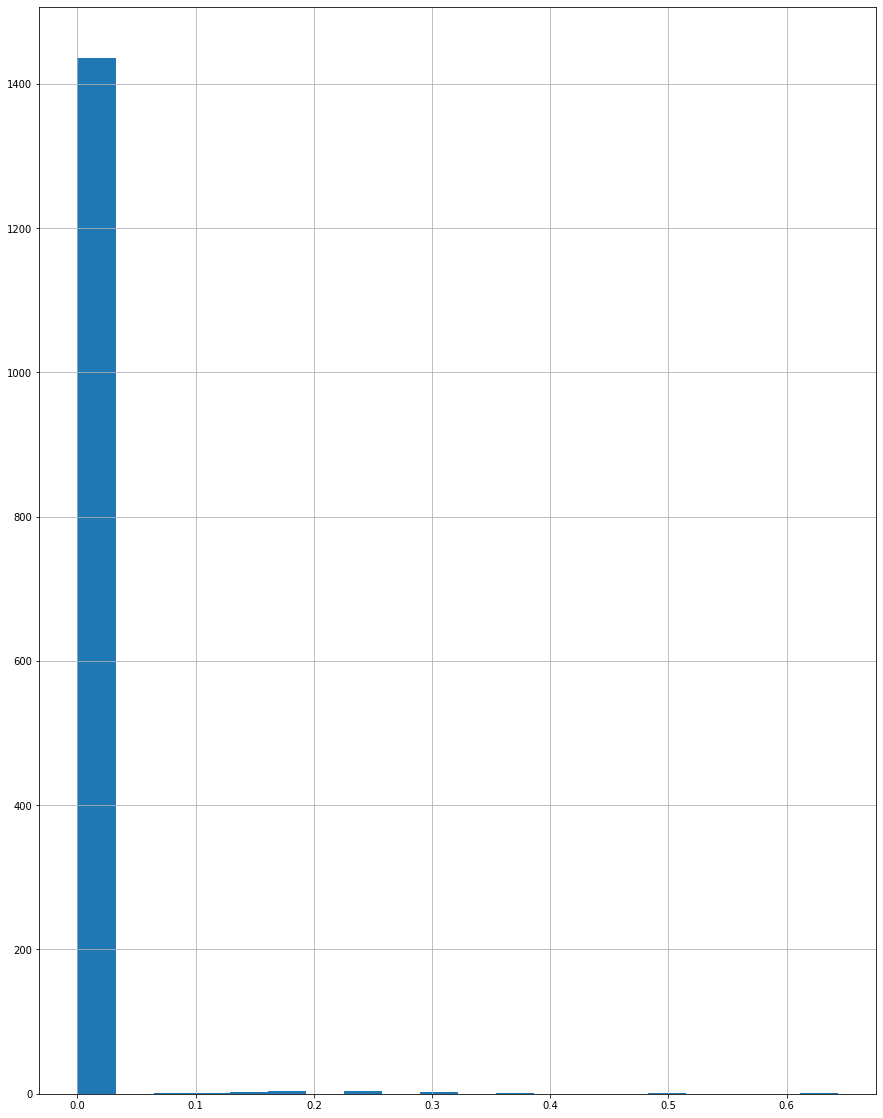

In [8]:
df['đầu'].hist(bins=20, figsize=(15,20))

#### 1.3. Chia tập dữ liệu thành tập huấn luyện và tập kiểm thử:

In [9]:
from sklearn.model_selection import train_test_split

training_set, testing_set = train_test_split(df, test_size=0.2, random_state=42)

In [10]:
X_train = training_set.drop("label", axis=1)
y_train = training_set["label"].copy()

In [11]:
y_train.head()

1262     ham
979      ham
792      ham
1433     ham
374     spam
Name: label, dtype: object

In [12]:
len(y_train)

1161

In [13]:
def encode_label(y_train):
    for i in range(len(y_train)):
        if y_train.iloc[i] == "ham" or y_train.iloc[i] == 0:
            y_train.iloc[i] = 0
        else:
            y_train.iloc[i] = 1
    return y_train.astype('int64')




In [14]:
y_train = encode_label(y_train)
y_train

1262    0
979     0
792     0
1433    0
374     1
       ..
1095    0
1130    0
1294    0
860     0
1126    0
Name: label, Length: 1161, dtype: int64

In [15]:
y_train.info()

<class 'pandas.core.series.Series'>
Int64Index: 1161 entries, 1262 to 1126
Series name: label
Non-Null Count  Dtype
--------------  -----
1161 non-null   int64
dtypes: int64(1)
memory usage: 18.1 KB


In [16]:
X_test = testing_set.drop("label", axis=1)
y_test = encode_label(testing_set["label"].copy())

In [17]:
y_test.head()

1036    0
1124    0
997     0
1316    0
529     1
Name: label, dtype: int64

### 2. Huấn luyện mô hình cây quyết định:

In [18]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(random_state=42)

tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [19]:
rd_index = 800
sample = X_train.loc[rd_index]
print(sample)
print(y_train.loc[rd_index])
tree_clf.predict([sample])


đầu               0.0
tuần              0.0
đừng              0.0
hội               0.0
topdev            0.0
                 ... 
95                0.0
search            0.0
object            0.0
irl               0.0
lothanhvinhtxt    0.0
Name: 800, Length: 2445, dtype: float64
0


c:\program files\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

### 2.1. Đo đạc hiệu suất sử dụng cross validation:

In [20]:
from sklearn.model_selection import cross_val_score

cross_val_score(tree_clf, X_train, y_train, cv=10, scoring="accuracy")

array([0.69230769, 0.78448276, 0.72413793, 0.77586207, 0.69827586,
       0.80172414, 0.77586207, 0.78448276, 0.74137931, 0.77586207])

### 2.2. Đo đạc hiệu suât sử dụng ma trận nhầm lẫn:

In [21]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(tree_clf, X_train, y_train, cv=10)


In [22]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

tree_matrix = confusion_matrix(y_train, y_train_pred)
tree_matrix

array([[454, 156],
       [128, 423]], dtype=int64)

Saving figure tree confusion matrix


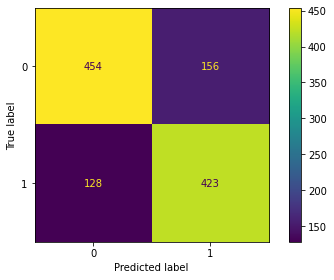

In [23]:
tree_matrix_display = ConfusionMatrixDisplay(
    confusion_matrix=tree_matrix)

tree_matrix_display.plot()

save_fig("tree confusion matrix")
plt.show()


#### Tính toán các điểm precision, recall và điểm f1:
* **Precision**: Tỉ lệ các mẫu dương được máy dự đoán chính xác trên tổng số các mẫu dương mà máy dự đoán ra.
* **Recall (Sensivity)**: Tỉ lệ các mẫu dương được máy dự đoán chính xác trên tổng số mẫu thực tế.
* **F1**: Trung bình có trọng số của hai điểm Precision và Recall.

In [24]:
from sklearn.metrics import precision_score, recall_score, f1_score

def getReportedScore(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    print("Precision score: ", precision)
    print("Recall score: ", recall)
    print("f1 score: ", f1)
    return precision, recall, f1


In [25]:
getReportedScore(y_train, y_train_pred)

Precision score:  0.7305699481865285
Recall score:  0.7676950998185118
f1 score:  0.7486725663716814


(0.7305699481865285, 0.7676950998185118, 0.7486725663716814)

In [26]:
tree_clf.predict_proba(X_train[10:20])

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

Triển khai một đường cong ROC:

In [27]:
from sklearn.metrics import RocCurveDisplay, roc_curve

y_proba_tree = cross_val_predict(tree_clf, X_train, y_train, cv = 10, method = "predict_proba")


In [28]:
y_score_tree = y_proba_tree[:, 1]
y_score_tree[:10]

array([1., 1., 0., 0., 1., 0., 0., 1., 1., 1.])

In [29]:
fpr_tree, tpr_tree, threshold_tree = roc_curve(y_train, y_score_tree)

In [30]:
threshold_tree

array([2.        , 1.        , 0.5       , 0.33333333, 0.        ])

In [31]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0,1], [0,1],"k--")
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.grid(True)
    plt.axis([0,1,0,1])

Saving figure Tree ROC Curve


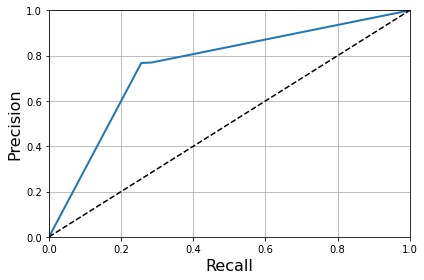

In [32]:
plot_roc_curve(fpr=fpr_tree, tpr=tpr_tree)
save_fig("Tree ROC Curve")

In [33]:
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [34]:
tree_params_grid = [
    {
        'max_depth': [50, 62, 70, 75],
        'max_leaf_nodes': [25, 51, 66, 73, 80],
        'min_samples_split': [31, 38, 90]
    }
]


In [35]:
from sklearn.model_selection import GridSearchCV

tree_clf_grid = DecisionTreeClassifier(random_state=42)
tree_grid_search = GridSearchCV(tree_clf_grid, tree_params_grid, cv=5, scoring='f1', return_train_score=True)
tree_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'max_depth': [50, 62, 70, 75],
                          'max_leaf_nodes': [25, 51, 66, 73, 80],
                          'min_samples_split': [31, 38, 90]}],
             return_train_score=True, scoring='f1')

In [36]:
print(str(tree_grid_search.best_params_) + "\nScore: " + str(tree_grid_search.best_score_))

{'max_depth': 62, 'max_leaf_nodes': 66, 'min_samples_split': 38}
Score: 0.7696522077216732


Saving figure optimized tree confusion matrix 


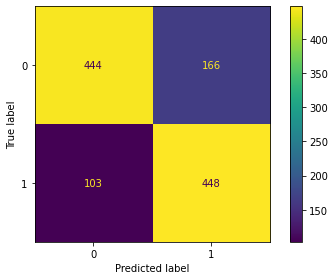

Precision score:  0.7296416938110749
Recall score:  0.8130671506352087
f1 score:  0.7690987124463519


(0.7296416938110749, 0.8130671506352087, 0.7690987124463519)

In [37]:
from sklearn.base import clone
tree_optimized_clf = clone(tree_grid_search.best_estimator_)
y_train_pred_2 = cross_val_predict(tree_grid_search.best_estimator_, X_train, y_train, cv=10)
tree_matrix_2 = confusion_matrix(y_train, y_train_pred_2)
tree_matrix_display_2 = ConfusionMatrixDisplay(
    confusion_matrix=tree_matrix_2)
tree_matrix_display_2.plot()
save_fig("optimized tree confusion matrix ")
plt.show()
getReportedScore(y_train, y_train_pred_2)

Saving figure Optimized Tree ROC Curve


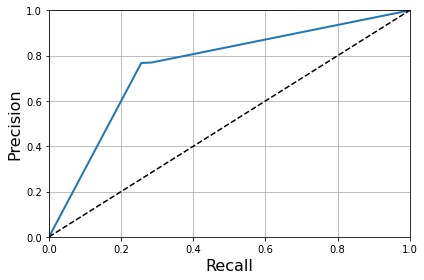

In [38]:
y_proba_tree_2 = cross_val_predict(
    tree_optimized_clf, X_train, y_train, cv=10, method="predict_proba")
y_score_tree_2 = y_proba_tree_2[:, 1]
fpr_tree_2, tpr_tree_2, threshold_tree_2 = roc_curve(y_train, y_score_tree)
plot_roc_curve(fpr_tree_2, tpr_tree_2)
save_fig("Optimized Tree ROC Curve")


In [39]:
save_model("tree_model.pkl", tree_optimized_clf)

### Huấn luyện mô hình SVMs


In [40]:
from sklearn.svm import LinearSVC

linear_svc = LinearSVC(loss="hinge", C=1, random_state=42)
linear_svc.fit(X_train, y_train)

LinearSVC(C=1, loss='hinge', random_state=42)

In [41]:
cross_val_score(linear_svc, X_train, y_train, cv=10, scoring="accuracy")


array([0.78632479, 0.80172414, 0.77586207, 0.78448276, 0.81034483,
       0.79310345, 0.78448276, 0.77586207, 0.77586207, 0.79310345])

In [42]:
def measureScore(estimator, X_train, y_train, cv=10, fig_title="Untitled"):
    y_train_pred = cross_val_predict(
        estimator, X_train, y_train, cv=cv)
    matrix = confusion_matrix(y_train, y_train_pred)
    matrix_display = ConfusionMatrixDisplay(
        confusion_matrix=matrix)
    matrix_display.plot()
    save_fig(fig_title)
    plt.show()
    getReportedScore(y_train, y_train_pred)


In [43]:
linear_svc.predict([X_train.loc[50]])

c:\program files\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [44]:
X_train.loc[3]

đầu               0.000000
tuần              0.000000
đừng              0.000000
hội               0.131411
topdev            0.000000
                    ...   
95                0.000000
search            0.000000
object            0.000000
irl               0.000000
lothanhvinhtxt    0.000000
Name: 3, Length: 2445, dtype: float64

In [45]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train.astype(np.float64))


In [46]:
from sklearn.svm import SVC

svc = SVC(kernel="poly", C=5, gamma='scale', degree=2, random_state=42)
svc.fit(X_train, y_train)

SVC(C=5, degree=2, kernel='poly', random_state=42)

Saving figure Poly SVC Confusion Matrix


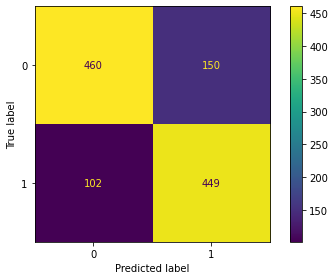

Precision score:  0.7495826377295493
Recall score:  0.8148820326678766
f1 score:  0.7808695652173913


In [47]:
measureScore(svc, X_train, y_train, cv=10, fig_title="Poly SVC Confusion Matrix")


Tinh chỉnh mô hình:

In [48]:
linear_svc.get_params()

{'C': 1,
 'class_weight': None,
 'dual': True,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'loss': 'hinge',
 'max_iter': 1000,
 'multi_class': 'ovr',
 'penalty': 'l2',
 'random_state': 42,
 'tol': 0.0001,
 'verbose': 0}

In [49]:
linear_svc_params_grid = [
    {
        'C' : [1],
        'penalty': ['l1', 'l2'],
        'dual': [False]
    }
]
linear_grid_search = GridSearchCV(LinearSVC(random_state=42), linear_svc_params_grid, cv=5, scoring='f1', return_train_score=True)
linear_grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LinearSVC(random_state=42),
             param_grid=[{'C': [1], 'dual': [False], 'penalty': ['l1', 'l2']}],
             return_train_score=True, scoring='f1')

{'C': 1, 'dual': False, 'penalty': 'l1'}
Score: 0.7737450238848754
Saving figure Linear SVC Grid Search 1


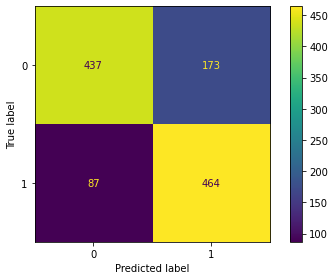

Precision score:  0.728414442700157
Recall score:  0.8421052631578947
f1 score:  0.7811447811447811


In [50]:
print(str(linear_grid_search.best_params_) +
      "\nScore: " + str(linear_grid_search.best_score_))
measureScore(linear_grid_search.best_estimator_, X_train, y_train, cv=10, fig_title="Linear SVC Grid Search 1")


In [51]:
save_model("linear_svc.pkl", linear_grid_search.best_estimator_)

In [52]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [53]:
svc_params_grid = [
    {
        'C' : [1],
        'coef0': [1],
        'degree': [2],
        'gamma': ['scale'],
        'kernel': ['rbf', 'poly', 'linear'],
    }
]


In [54]:
svc_grid_search = GridSearchCV(
    SVC(random_state=42), svc_params_grid, scoring='f1', return_train_score=True)
svc_grid_search.fit(X_train, y_train)


GridSearchCV(estimator=SVC(random_state=42),
             param_grid=[{'C': [1], 'coef0': [1], 'degree': [2],
                          'gamma': ['scale'],
                          'kernel': ['rbf', 'poly', 'linear']}],
             return_train_score=True, scoring='f1')

{'C': 1, 'coef0': 1, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Score: 0.7797966991834574
Saving figure Linear SVC Grid Search 1


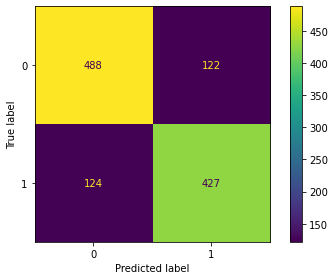

Precision score:  0.7777777777777778
Recall score:  0.7749546279491834
f1 score:  0.7763636363636364


In [55]:
print(str(svc_grid_search.best_params_) +
      "\nScore: " + str(svc_grid_search.best_score_))
measureScore(svc_grid_search.best_estimator_, X_train,
             y_train, cv=10, fig_title="Linear SVC Grid Search 1")


In [56]:
out = df.columns.to_list()

In [57]:
pickle.dump(out, open("word.txt", 'wb'))

Saving figure Final Confusion matrix


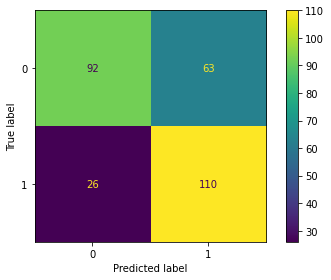

Precision score:  0.6358381502890174
Recall score:  0.8088235294117647
f1 score:  0.7119741100323624


In [58]:
best_linear_svc = clone(linear_grid_search.best_estimator_)
measureScore(best_linear_svc, X_test, y_test, cv=10, fig_title="Final Confusion matrix")

In [64]:
idf_score = pickle.load(open("idf_score.out", "rb"))

In [65]:
idf_score

{'đầu': 1.931517694985801,
 'tuần': 2.258876629372131,
 'đừng': 2.161966616364075,
 'hội': 1.8397473216301556,
 'topdev': 2.0158385806858368,
 'qc': 1.800238780346482,
 '2': 1.931517694985801,
 'triệu': 2.258876629372131,
 'rước': 2.6848453616444123,
 'tuyệt': 2.462996612028056,
 'chiêu': 3.161966616364075,
 'chụp': 2.6848453616444123,
 'đêm': 2.462996612028056,
 'hàng': 2.0158385806858368,
 'lộc': 2.8609366207000937,
 'siêu': 2.20772410692475,
 'sung': 2.6848453616444123,
 '12tr': 3.161966616364075,
 'áo': 2.8609366207000937,
 'sạch': 3.161966616364075,
 'hoàn': 1.800238780346482,
 'hảo': 3.161966616364075,
 'đón': 2.8609366207000937,
 'mừng': 2.048023264057238,
 'tết': 2.20772410692475,
 'sẵn': 2.316868576349818,
 'sàng': 2.383815365980431,
 'thách': 3.161966616364075,
 'thức': 2.6848453616444123,
 'quy': 2.20772410692475,
 'chuẩn': 2.8609366207000937,
 'mua': 2.048023264057238,
 'toán': 2.383815365980431,
 '1': 1.9858753573083936,
 'celebrate': 2.6848453616444123,
 'lunar': 2.684845

In [66]:
bag_of_word = pickle.load(open("word.txt", "rb"))

In [67]:
bag_of_word


['đầu',
 'tuần',
 'đừng',
 'hội',
 'topdev',
 'qc',
 '2',
 'triệu',
 'rước',
 'tuyệt',
 'chiêu',
 'chụp',
 'đêm',
 'hàng',
 'lộc',
 'siêu',
 'sung',
 '12tr',
 'áo',
 'sạch',
 'hoàn',
 'hảo',
 'đón',
 'mừng',
 'tết',
 'sẵn',
 'sàng',
 'thách',
 'thức',
 'quy',
 'chuẩn',
 'mua',
 'toán',
 '1',
 'celebrate',
 'lunar',
 'new',
 'year',
 '5e',
 'arena',
 'int',
 'roll',
 'room',
 'tặng',
 'quà',
 '16tr',
 'chất',
 'lừ',
 'mail',
 '“in',
 'tư”',
 'lỡ',
 '489',
 'tham',
 'gia',
 'chia',
 'sẻ',
 'sum',
 'vầy',
 'tác',
 'chủ',
 'bóng',
 'tối',
 'chúc',
 '2022',
 'nhâm',
 'dần',
 'lì',
 'xì',
 'deal',
 'samsung',
 'túc',
 'đột',
 'phá',
 'màn',
 'qc\xa0',
 '“hết',
 'chấm”',
 'ưu',
 'đãi',
 '45',
 'khởi',
 'sắc',
 'hấp',
 'khám',
 'chinh',
 'phục',
 'mục',
 'tiêu',
 'bí',
 'mật',
 'hé',
 'lộ',
 'kèm',
 'sở',
 'hữu',
 '30',
 'tiện',
 'ích',
 'chrome',
 'designer',
 'developer',
 'chớp',
 'ứng',
 'tuyển',
 'vị',
 'trí',
 'hôm',
 'yêu',
 'chiều',
 '22',
 'sắm',
 'tv',
 'hạn',
 'khỏe',
 'đẹp',
 'lo',

In [69]:

word_dict_list = dict.fromkeys(bag_of_word, 0)


In [108]:
new_sample = ['quảng', 'cáo']
def bag_of_word_transform(new_sample):
    sample_dict_list = word_dict_list.copy()
    for token in new_sample:
        try:
            sample_dict_list[token] += 1
        except:
            continue
    return sample_dict_list

In [102]:
def tf(word_dict_list, sentence):
    result_vector = dict()
    total_word = len(sentence)
    for keys in word_dict_list:
        result_vector[keys] = word_dict_list[keys] / float(total_word)
    return result_vector
    

In [103]:
def tf_idf_score(tf_score, idf_score):
    tf_idf = list()
    for key in idf_score:
        tf_idf.append(tf_score[key] * idf_score[key])
    return tf_idf


In [85]:
sample_tf_idf

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [91]:
sample = X_test.iloc[0]
sample

đầu               0.0
tuần              0.0
đừng              0.0
hội               0.0
topdev            0.0
                 ... 
95                0.0
search            0.0
object            0.0
irl               0.0
lothanhvinhtxt    0.0
Name: 1036, Length: 2445, dtype: float64

In [94]:
best_linear_svc.fit(X_train, y_train)

LinearSVC(C=1, dual=False, penalty='l1', random_state=42)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0

In [123]:
new_sample = [['lovinh', 'awesome', 'remote', 'u',
              'job', 'waiting', 'engineer', 'like', '7'],
              ['kìa', 'quen', 'mua', 'bảo', 'hiểm', 'tnds', 'ô', 'tô'],
              ['chào', 'gửi', 'tài', 'liệu']
]
sample_tf_idf = []
for instance in new_sample:
    sample_tf_idf.append(tf_idf_score(tf(bag_of_word_transform(instance), instance), idf_score))
sample_tf_idf


[[0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,

In [124]:
best_linear_svc.predict(sample_tf_idf)

c:\program files\python38\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([0, 1, 1], dtype=int64)

In [125]:
pickle.dump(best_linear_svc, open("best_linear_svc_model.pkl", "wb"))